In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
prosp_pib = pd.read_csv('../BDD/perspective-pib-ocde.csv', sep=';')
prosp_pop = pd.read_csv('../BDD/population-perspective-UNO.csv', sep=';')

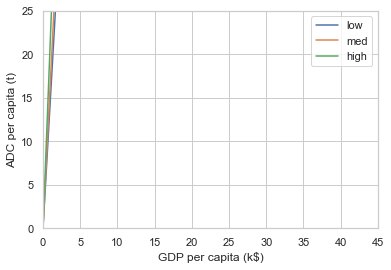

In [3]:
import metalsprospective as mp
sns.set_theme(style="whitegrid")
mp.ADC_GDP()

In [4]:
ch_table = pd.merge(prosp_pop, prosp_pib, left_on =['Time'], right_on=['TIME'])
ch_table = ch_table[ch_table.Location == "China" ]
ch_table = ch_table[ch_table.LOCATION=='CHN']
ch_table.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
3658,156,China,2,Medium,2016,2016.5,726052.413,687996.940,1414049.353,150.620,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2016,19446705.92
27031,156,China,2,Medium,2017,2017.5,729462.380,691559.414,1421021.794,151.362,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2017,20788528.63
50404,156,China,2,Medium,2018,2018.5,732677.783,694970.006,1427647.789,152.068,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2018,22173019.96
73777,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1433783.692,152.722,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2019,23601365.67
129000,156,China,2,Medium,2020,2020.5,738247.340,701076.434,1439323.774,153.312,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2020,24896400.00


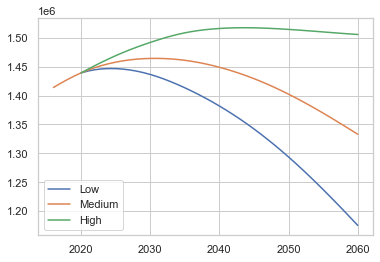

In [5]:
low= ch_table[ch_table.Variant=="Low"]
medium= ch_table[ch_table.Variant=="Medium"]
high= ch_table[ch_table.Variant=="High"]
plt.plot(low['Time'],low['PopTotal'], label='Low')
plt.plot(medium['Time'],medium['PopTotal'], label='Medium')
plt.plot(high['Time'],high['PopTotal'], label='High')
plt.legend()

Text(0.5, 1.0, 'GDP per capita projections (UNO)')

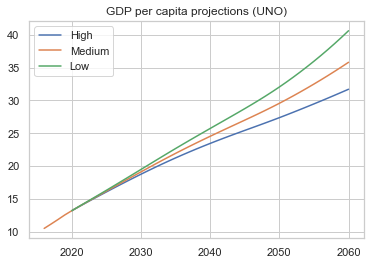

In [6]:
gdpc_m = (medium['Value']/medium['PopTotal'])*(10.26168/13.453050)
gdpc_l = (low['Value']/low['PopTotal'])*(10.26168/13.453050)
gdpc_h = (high['Value']/high['PopTotal'])*(10.26168/13.453050)
plt.plot(low['Time'],gdpc_h, label='High')
plt.plot(medium['Time'],gdpc_m, label='Medium')
plt.plot(high['Time'],gdpc_l, label='Low')
plt.legend()
plt.title("GDP per capita projections (UNO)")

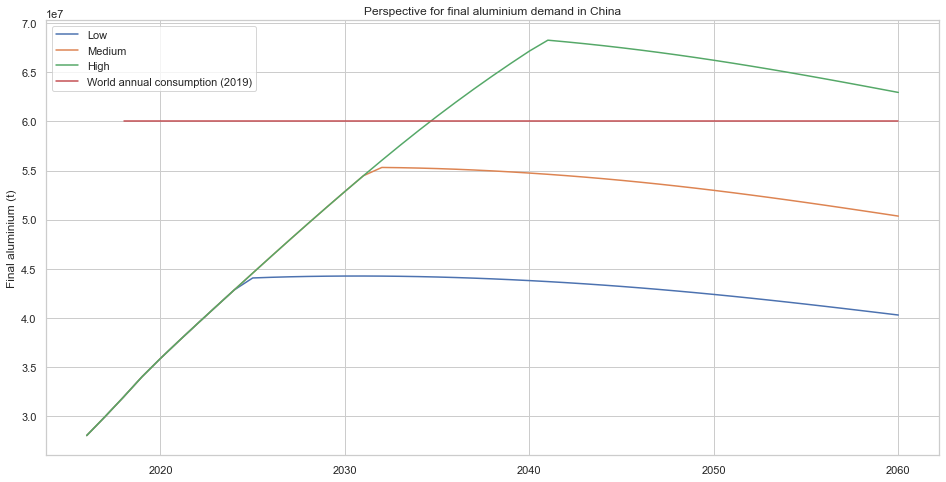

In [7]:

plt.figure(figsize=(16,8))
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,16,36)*medium['PopTotal'], label= "Low")
plt.plot(medium['Time'], mp.fADC(gdpc_m,17/9, -15/26, 20,40)*medium['PopTotal'], label= "Medium")
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,25 ,45)*medium['PopTotal'], label= "High")
plt.plot([2018,2060], [6*10**7, 6*10**7], label="World annual consumption (2019)")
plt.ylabel("Final aluminium (t)")
plt.title("Perspective for final aluminium demand in China")
plt.legend()

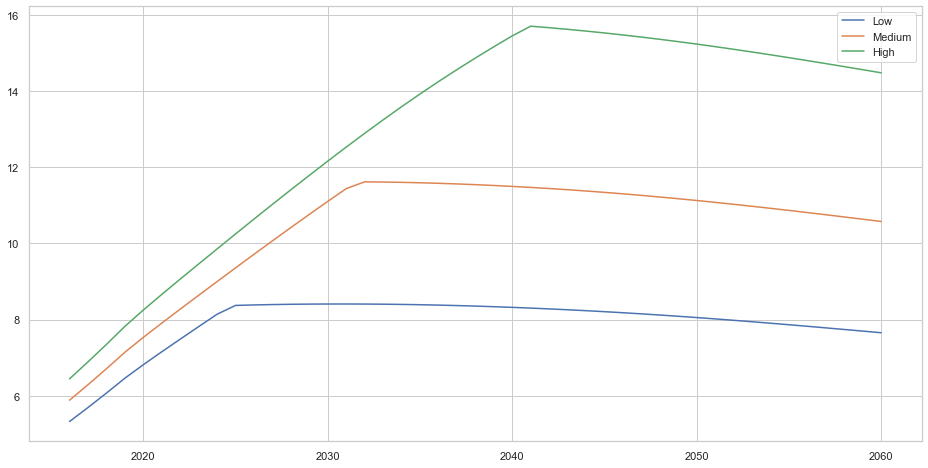

In [8]:

plt.figure(figsize=(16,8))
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,16,36)*medium['PopTotal']*190*10**-9, label= "Low")
plt.plot(medium['Time'], mp.fADC(gdpc_m,17/9, -15/26, 20,40)*medium['PopTotal']*210*10**-9, label= "Medium")
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,25 ,45)*medium['PopTotal']*230*10**-9, label= "High")
plt.legend()

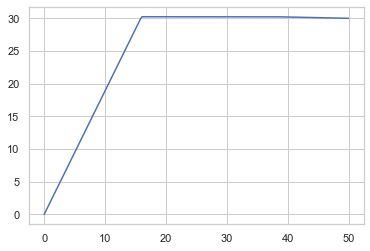

In [9]:
plt.plot(np.linspace(0,50, 200), mp.fADC(np.linspace(0,50, 200),  17/9,-0.02,16,38))

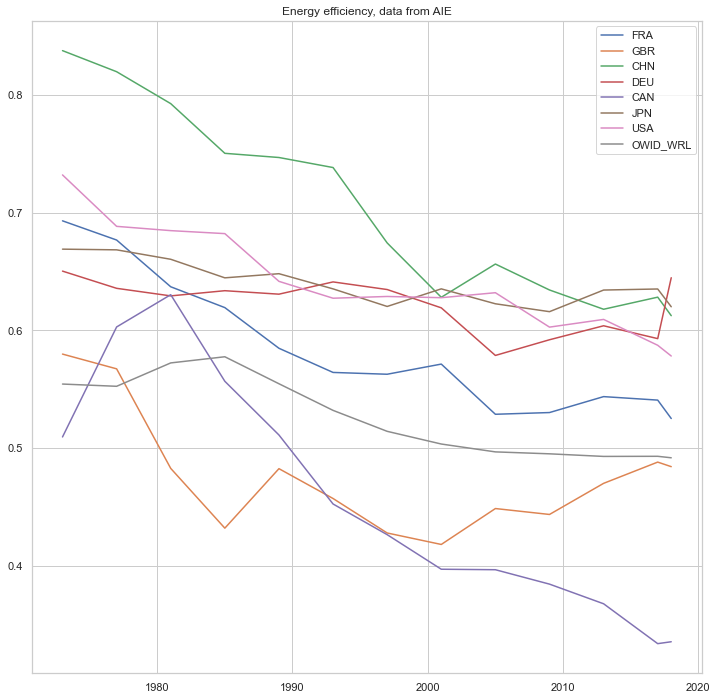

In [10]:
def energy_efficiency(countries = ['FRA', 'GBR', 'CHN', 'DEU', 'CAN', 'JPN',  'USA', 'OWID_WRL' ]) :

    sns.set_theme(style='whitegrid')
    energy = pd.read_csv('../BDD/energy-final.csv', sep=';')

    plt.figure(figsize=(12,12))
    for code in countries : 
        tab =energy[energy.Code==code].sort_values(by = 'Year')
       
        year = tab['Year']
        primary = np.array(tab['Primary (pJ)'])
        final = np.array(tab['Final energy (pJ)'])
        

        plt.plot(year, final/primary, label = code)
        plt.legend()
        plt.title("Energy efficiency, data from AIE")

    return None
energy_efficiency()

No handles with labels found to put in legend.


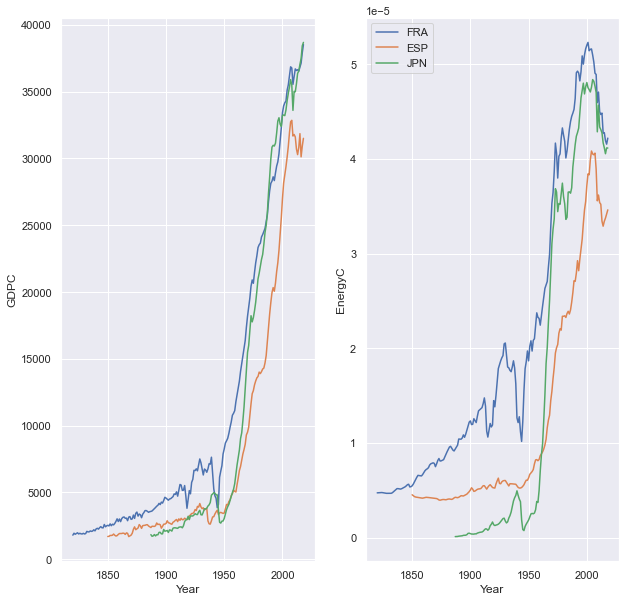

In [11]:
import data_visualization as dv
dv.comparative_plot_bis(countries= ['FRA', 'ESP', 'JPN'], x_data=['Year', 'Year' ], y_data=['GDPC', 'EnergyC' ])
